## EDA

In [18]:
#Upload csv excel file
import pandas as pd
import matplotlib.pyplot as plt 

X_train = pd.read_csv('/dshome/WoongLab/heo/oil_kamp/Data/X_train.csv')
X_test = pd.read_csv('/dshome/WoongLab/heo/oil_kamp/Data/X_test.csv')
y_train = pd.read_csv('/dshome/WoongLab/heo/oil_kamp/Data/y_train.csv')
y_test = pd.read_csv('/dshome/WoongLab/heo/oil_kamp/Data/y_test.csv')
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584640, 4)
(250560, 4)
(584640, 1)
(250560, 1)


In [19]:
y_train.columns=['TAG']
y_test.columns=['TAG']


In [20]:
y_train['TAG'].value_counts()


1    460693
0    123947
Name: TAG, dtype: int64

In [21]:
abnormal_ratio=y_train['TAG'].value_counts()[0]/(y_train['TAG'].value_counts()[0]+y_train['TAG'].value_counts()[1])*100
normal_ratio=y_train['TAG'].value_counts()[1]/(y_train['TAG'].value_counts()[0]+y_train['TAG'].value_counts()[1])*100

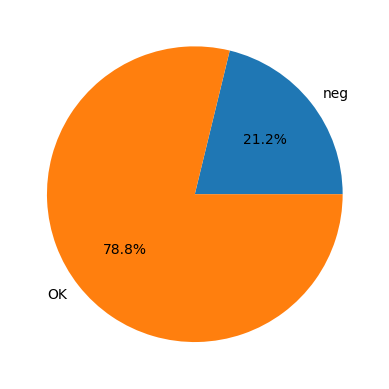

In [22]:
# 윤활유의 품질이 불량인 비율
neg_ratio=y_train['TAG'].value_counts()[0]/(y_train['TAG'].value_counts()[0]+y_train['TAG'].value_counts()[1])*100
# 윤활유의 품질이 정상인 비율
ok_ratio=y_train['TAG'].value_counts()[1]/(y_train['TAG'].value_counts()[0]+y_train['TAG'].value_counts()[1])*100
ratio=[neg_ratio, ok_ratio]
labels=['neg','OK']

plt.pie(ratio,labels=labels,autopct='%.1f%%')
plt.show()

In [23]:
# Show column header

print(X_train.columns)

Index(['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP'], dtype='object')


In [24]:
# Show summary statistic 
# Check min data

X_train.describe()

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
count,584640.000000,584640.000000,584640.000000,584640.000000
mean,509.297729,460.350669,582.460663,3.194862
std,128.354555,639.773102,1212.647564,0.011826
min,308.000000,0.000000,0.000000,3.170000
25%,430.000000,119.000000,186.000000,3.190000
50%,469.000000,168.000000,383.000000,3.190000
75%,502.000000,218.000000,582.000000,3.200000
max,832.000000,1796.000000,55252.000000,3.230000


In [25]:
# Check null data 

X_train.isnull().sum()

MELT_TEMP      0
MOTORSPEED     0
MELT_WEIGHT    0
INSP           0
dtype: int64

<AxesSubplot: >

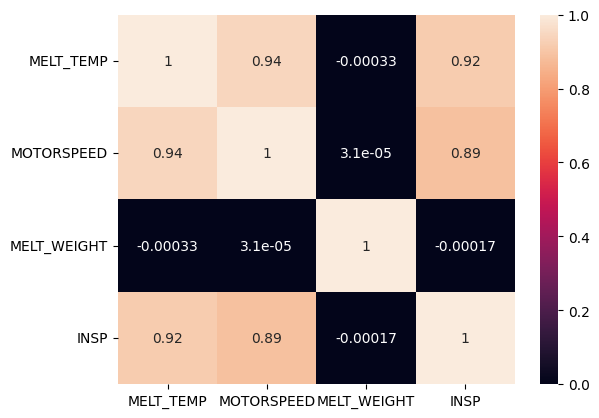

In [26]:
# Relationship analysis

import seaborn as sns 
correlation=X_train.corr() 
sns.heatmap(correlation, xticklabels=correlation.columns,
            yticklabels=correlation.columns,annot=True)

In [34]:
#Feature Selection (Select the clearly different one)
import seaborn as sns
import matplotlib.pyplot as plt


train_data=pd.concat([X_train,y_train],axis=1)
train_data['TAG']=train_data['TAG'].map({0:'Neg',1:'OK'})

def plot_box(train_data, cols, col_x = 'TAG'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=train_data)
        plt.xlabel(col_x)  # Set text for the x axis
        plt.ylabel(col)    # Set text for y axis
        plt.show()

In [35]:
train_data

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,410,74,128,3.19,Neg
1,740,1740,658,3.22,OK
2,411,222,569,3.18,OK
3,764,1720,316,3.21,OK
4,769,1703,512,3.22,OK
...,...,...,...,...,...
584635,456,76,2,3.19,Neg
584636,749,1725,28,3.22,OK
584637,496,136,452,3.19,OK
584638,466,167,382,3.19,OK


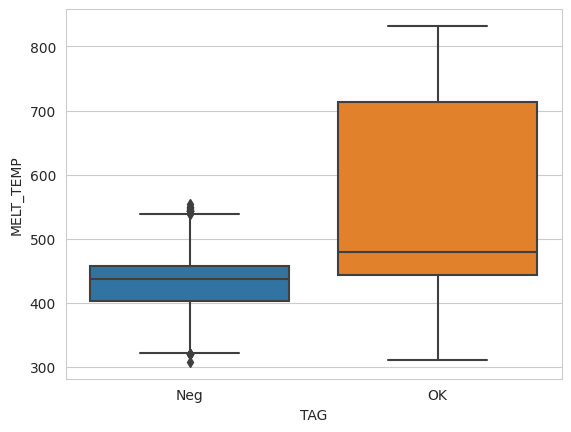

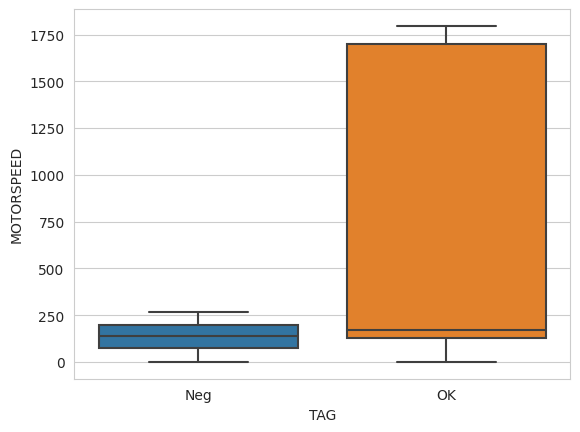

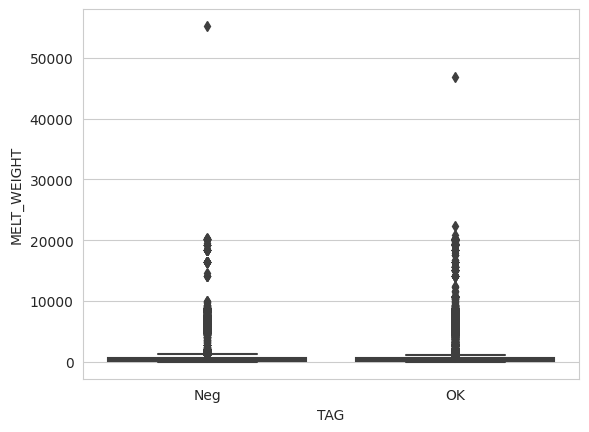

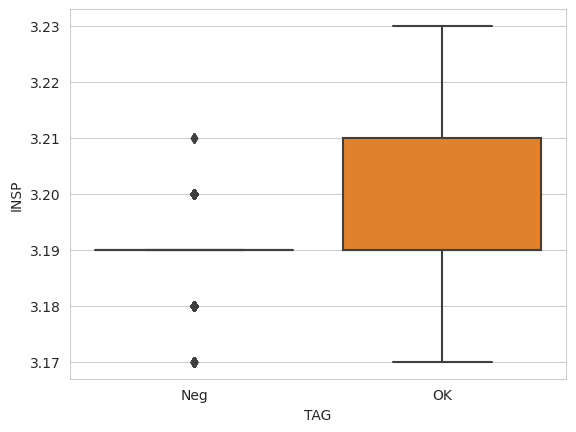

In [36]:
num_cols = ['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT','INSP']
plot_box(train_data, num_cols)